Importing Libraries

In [15]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [31]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [32]:
# Load training dataset
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
    seed=123
)

Found 2137 files belonging to 8 classes.


In [33]:
# Load test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
    seed=123
)

Found 1011 files belonging to 8 classes.


In [34]:
class_names =training_set.class_names
class_names

['chair',
 'cobra',
 'dog',
 'no_pose',
 'shoudler_stand',
 'traingle',
 'tree',
 'warrior3']

In [35]:
class_names =test_set.class_names
class_names

['chair',
 'cobra',
 'dog',
 'no_pose',
 'shoudler_stand',
 'traingle',
 'tree',
 'warrior3']

In [36]:
# Define augmentation and normalization
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.4),
    layers.RandomWidth(0.2),
    layers.RandomHeight(0.2),
    layers.RandomZoom(0.2),
    layers.RandomFlip("horizontal")
])

In [37]:
# Normalization layer
resize_and_rescale = tf.keras.Sequential([
    layers.Rescaling(1.0 / 255)
])


In [38]:
# Apply augmentation to training set, then normalize
training_set = training_set.map(lambda x, y: (resize_and_rescale(data_augmentation(x)), y))


In [39]:
# Only normalize the test set (no augmentation)
test_set = test_set.map(lambda x, y: (resize_and_rescale(x), y))

In [40]:
# Prefetching for performance
AUTOTUNE = tf.data.AUTOTUNE
training_set = training_set.cache().prefetch(buffer_size=AUTOTUNE)
test_set = test_set.cache().prefetch(buffer_size=AUTOTUNE)

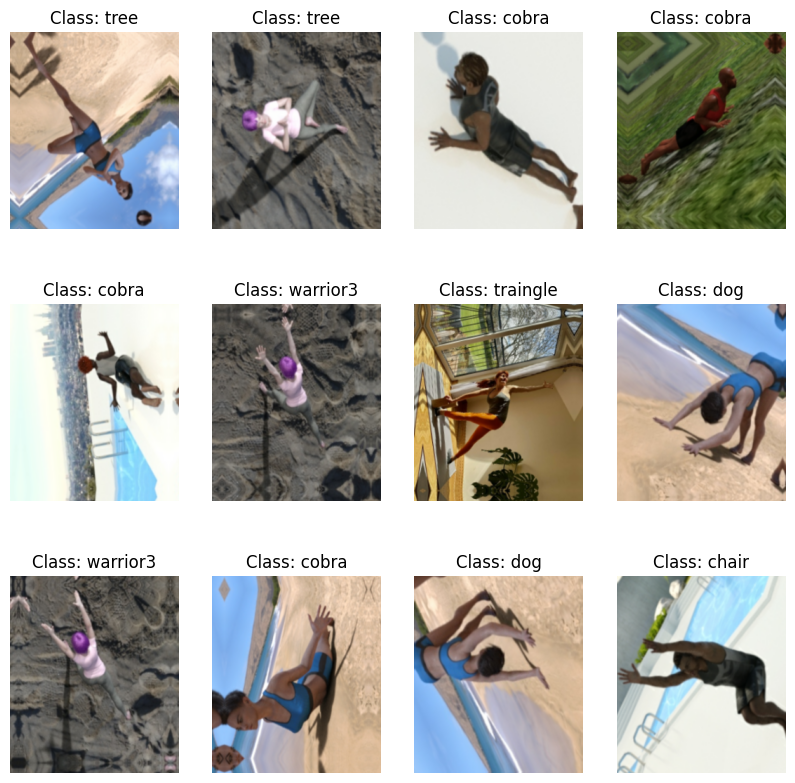

In [41]:
# Plotting a batch of augmented training set images to verify
plt.figure(figsize=(10, 10))
for image_batch, label_batch in training_set.take(1):  # Take one batch to display
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        
        # Convert back to [0, 255] range for display
        img = image_batch[i].numpy() * 255
        img = img.astype("uint8")
        
        plt.imshow(img)
        plt.title("Class: " + class_names[label_batch[i].numpy()])
        plt.axis("off")
plt.show()

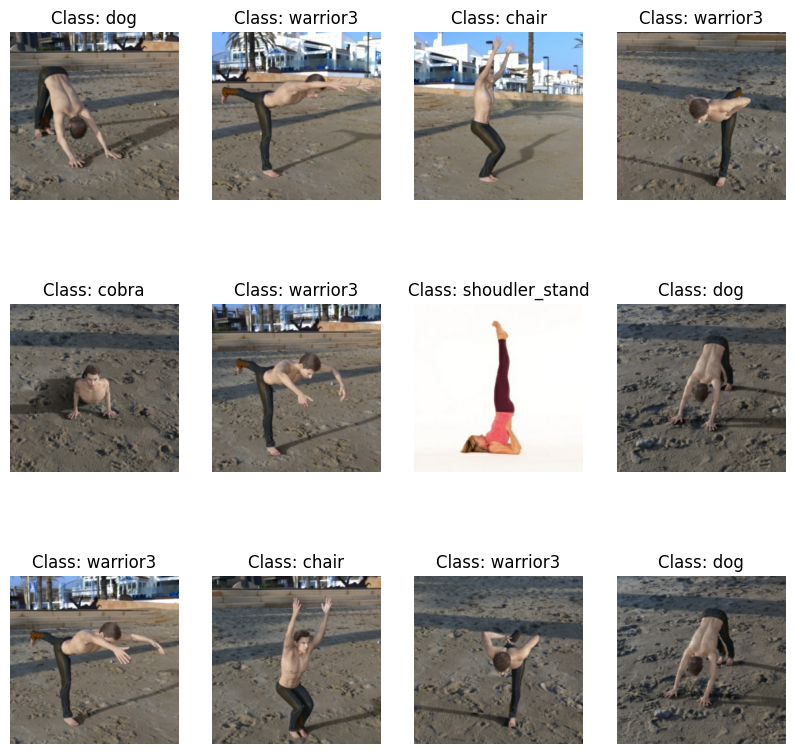

In [42]:
# Plotting a batch of test images to verify (without augmentation)
plt.figure(figsize=(10, 10))
for image_batch, label_batch in test_set.take(1):  # Take one batch to display
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        
        # Convert back to [0, 255] range for display
        img = image_batch[i].numpy() * 255
        img = img.astype("uint8")
        
        plt.imshow(img)
        plt.title("Class: " + class_names[label_batch[i].numpy()])
        plt.axis("off")
plt.show()

In [ ]:
### END